# Hermitov kubični zlepek

Poleg vrednosti funkcije je na voljo tudi vrednost odvoda.

$x_1$ | $f(x_1)$ | f'(x_1)\
$x_2$ | $f(x_2)$ | f'(x_2)\
...\
$x_n$ | $f(x_n)$ | f'(x_n)

Na vsakem intervalu imamo na voljo 4 podatke. To pomeni, da lahko neodvisno poiščemo na vsakem intervalu kubično funkcijo.

Problem bomo sprva rešili za interval [0, 1] za eno kubično funkcijo. Uporabili bomo Hermitovo bazo polinomov.

$h_{i,j}(t)=a_{ij}+b_{ij}t+c_{ij}t^2+d_{ij}t^3$

$h_{ij}(0)=a_{ij}$\
$h_{ij}(1)=a_{ij} + b_{ij} + c_{ij} + d_{ij}$\
$h'_{ij}(0)=b_{ij}$\
$h'_{ij}(1)=b_{ij} +2c_{ij}+3d_{ij}$

Hermitova baza:

A = [\
[1 0 0 0],\
[1 1 1 1],\
[0 1 0 0],\
[0 1 2 3]\
]

$A^{-1}$=[\
[1 0 0 0],\
[0 0 1 0],\
[-3 3 -2 -1],\
[2 -2 1 1]]

$h_{00}(t)=1-3t^2+2t^3$\
$h_{01}(t)=3t^2-2t^3$\
$h_{10}(t)=t-2t^2+t^3$\
$h_{11}(t)=-t^2+t^3$

$p(t)=y_0h_{00}(t)+y_1h_{01}(t)+dy_0h_{10}(t)+dy_1h_{11}(t),$\
$t\in[0, 1]$

Če prenesemo definicijo na interval $[x_i, x_{i+1}]$:

$p(x)=y_ih_{00}(t)+y_{i+1}h_{01}(t)+(x_{i+1}-x_i)(dy_ih_{10}(t)+dy_{i+1}h_{11}(t)),$\
$t = \frac{x-x_i}{x_{i+1}-x_i}$

In [32]:
def hermit_cubic(X, y, dy, p):
    # find the points that are closest to p
    i = X.searchsorted(p)-1
    #for i in range(len(X)):
    #    if X[i] > p:
    #        break
    #i -= 1
    t = (p - X[i]) / (X[i+1] - X[i])
    h00 = 1 - 3*t**2 + 2*t**3
    h10 = t - 2*t**2 + t**3
    h01 = 3*t**2 - 2*t**3
    h11 = -t**2 + t**3

    return h00*y[i] + h01*y[i+1] + (X[i+1] - X[i])*(h10*dy[i] + h11*dy[i+1])

In [86]:
# plot the hermit cubic
import numpy as np
import matplotlib.pyplot as plt
def plot_hermit_cubic(X, y, dy, ratio=''):
    X = np.array(X)
    y = np.array(y)
    dy = np.array(dy)
    x = np.linspace(0, max(X), 100)
    f = np.zeros(len(x))
    for i in range(len(x)):
        f[i] = hermit_cubic(X, y, dy, x[i])
    plt.figure(figsize=(5,3))
    plt.plot(X, y, 'ro')
    plt.plot(x, f)
    # plot tangents of arclength 1 at the points
    size = 0.5
    for i in range(len(X)):
        plt.arrow(X[i], y[i], size, dy[i]*size, head_width=0.1, head_length=0.1, fc='k', ec='k')
    # 1:1 ratio of x and y
    if ratio =='equal':
        plt.axis('equal') 
    plt.show()

0.5


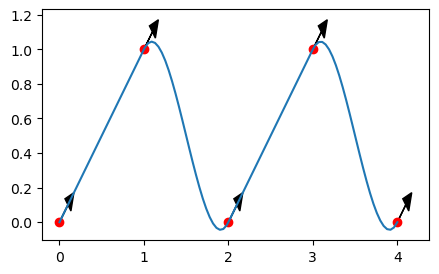

In [84]:
X = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0, 1, 0])
dy = np.array([1, 1, 1, 1, 1])

p = 1.5
print(hermit_cubic(X, y, dy, p))
plot_hermit_cubic(X, y, dy)

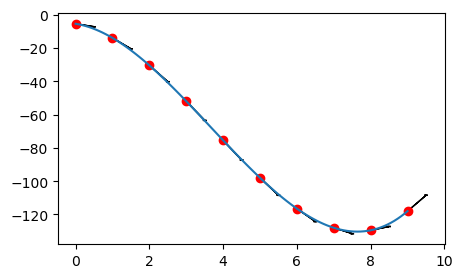

In [87]:
X = np.arange(10)
y = 0.5*(X-1)**3 - (2*X+2)**2 + 3*X - 1
dy = 1.5*(X-1)**2 - 2*(2*X+2)*2 + 3
plot_hermit_cubic(X, y, dy)

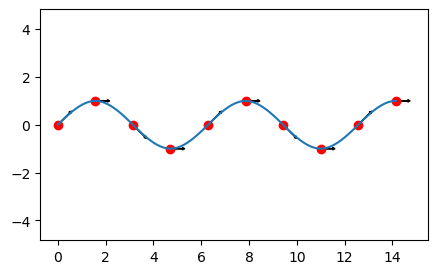

In [89]:
# sine example
X = np.arange(10)/(4/(2*np.pi))
y = np.sin(X)
dy = np.cos(X)
plot_hermit_cubic(X, y, dy, 'equal')